In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import  numpy as np
from sklearn.metrics import confusion_matrix

In [95]:
tf.__version__

'1.3.0'

In [96]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [97]:
print("size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t\t{}".format(len(data.validation.labels)))

size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:		5000


In [98]:
data.test.labels.shape

(10000, 10)

In [99]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [100]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [101]:
data.test.cls.shape
data.test.cls[:6]

array([7, 2, 1, 0, 4, 1])

In [102]:
ima_size = 28 # MNIST images 28 pixels in each dimension
ima_size_flat = ima_size ** 2
ima_shape = (ima_size, ima_size)
num_cls = 10 # number of classes, one class for each 0-9 digits

In [103]:
def plot_images(images, cls_true, cls_pred=None):
    '''
    plot_images is used to plot 9 images, lined by 3*3.
    cls_true: the true class of image
    cls_pred: the prediction class of image
    '''
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # plot image
        ax.imshow(images[i].reshape(ima_shape), cmap='binary')
        # show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        # remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
    

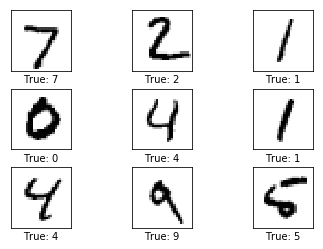

In [104]:
images = data.test.images[:9] # get the first 9 images from data/train
cls_true = data.test.cls[:9] # get the corresponded 9 true labels 
# plot
plot_images(images=images, cls_true=cls_true)

In [105]:
x= tf.placeholder(tf.float32, [None, ima_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_cls])
y_true_cls = tf.placeholder(tf.int64, [None])

In [106]:
W = tf.Variable(tf.zeros([ima_size_flat, num_cls])) # weights matrix
b = tf.Variable(tf.zeros([num_cls])) # biases

In [107]:
logits = tf.matmul(x, W) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [108]:
# define the cross entropy, smaller cross entropy, better for prediction
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [109]:
# optimize method 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [110]:
# juge the predicted class is equal to the true class or not
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [111]:
session = tf.Session() # create a session
session.run(tf.global_variables_initializer())

In [112]:
batch_size = 100

In [113]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # get a batch of training examples
        # x_batch now holds a batch of images 
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        # put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph
        # Note that the placeholder for y_true_cls is not set 
        # because it is not used during the training
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train 
        # to the placeholder variables and then run the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        

In [114]:
# test data
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [115]:
def print_accuracy():
    # to print the accuracy of test data
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    # print the accuracy
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [116]:
x_batch.shape
optimize(1)

In [117]:
print_accuracy()

Accuracy on test-set: 51.1%


In [118]:
optimize(1000)
print_accuracy()

Accuracy on test-set: 91.9%


In [119]:
def plot_example_errors():
    # Use TF to get a list of boolean values
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
    # Negate th boolean array
    incorrect = (correct == False)
    # get the images from the test-set that have been 
    # incorrectly classified
    images = data.test.images[incorrect] # numpy properties, return the True indexes
    # get the predicted classes
    cls_pred = cls_pred[incorrect]
    # get the true classes
    cls_true = data.test.cls[incorrect]
    # plot 9 images
    plot_images(images=images[:9], cls_true=cls_true[:9],
                cls_pred=cls_pred[:9])

In [134]:
optimize(10)
print_accuracy()
data.test.images.shape

Accuracy on test-set: 91.9%


(10000, 784)

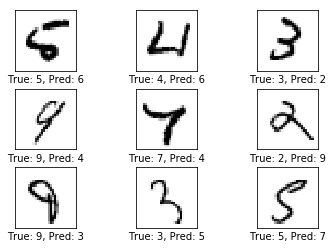

In [135]:
plot_example_errors()

In [136]:
def plot_weights():
    '''
    plot the weights 
    '''
    # get the values for weights from TF variable
    w = session.run(W)
    print(w)
    # get the lowest and highest values for the weights
    # this is used to correct the color intensity across
    # the images so they can be compared with each other
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(ima_shape)
            ax.set_xlabel("Weights: {0}".format(i))
            # plot the image
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        # remove the ticks
        ax.set_xticks([])
        ax.set_yticks([])
    

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


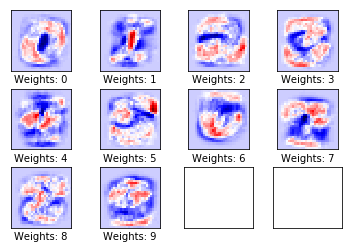

In [137]:
plot_weights()